In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.cluster import KMeans

In [2]:
data= pd.read_csv('shopping-data.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.shape

(200, 5)

In [5]:
data=data.drop_duplicates()

In [6]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
a=["Age","Annual Income (k$)","Spending Score (1-100)"]

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64
0.48556885096681657


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


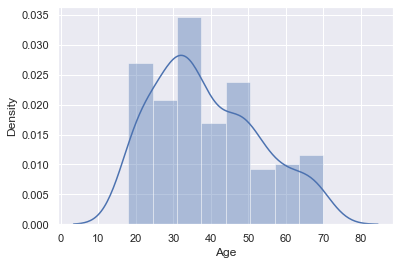

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64
0.3218425498619055


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


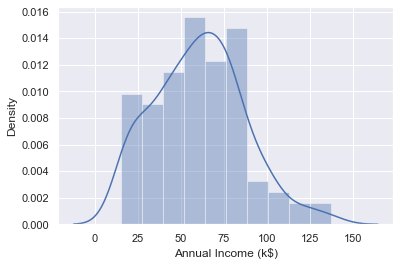

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64
-0.047220201374263374


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


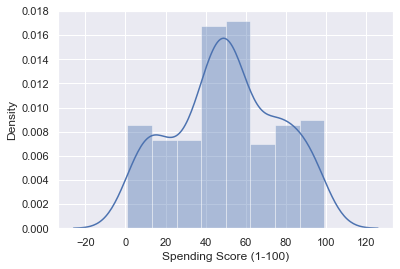

In [9]:
for i in a:
    print(data[i].describe())
    print(data[i].skew())
    sns.distplot(data[i])
    plt.show()

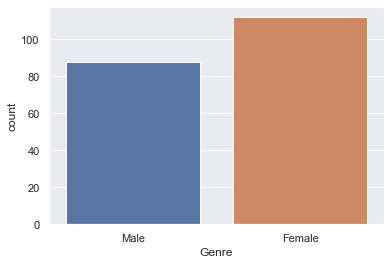

In [10]:
sns.countplot(x='Genre',data=data);

In [11]:
new_data= data.iloc[:,3:5]
new_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [12]:
kmeans= KMeans(n_clusters=2)

In [13]:
kmeans.fit(new_data)

KMeans(n_clusters=2)

In [14]:
centers= kmeans.cluster_centers_
label= kmeans.labels_

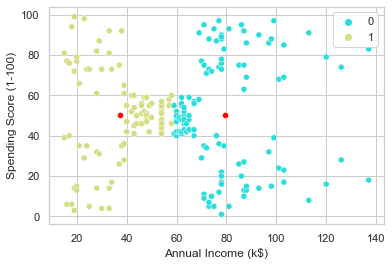

In [15]:
sns.set_style('whitegrid')
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=new_data, palette='rainbow',hue=label)
sns.scatterplot(x=centers[:,0],y=centers[:,1],color= 'red');

In [16]:
inertia=[]
k_range= range(1,15)

for i in k_range:
    kmeans= KMeans(i)
    kmeans.fit(new_data)
    inertia.append(kmeans.inertia_)

In [17]:
inertia

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30227.60651315203,
 25029.25342493588,
 21806.812998695466,
 19634.554629349972,
 18271.813541637388,
 16106.965057433605,
 14400.409317219428,
 13620.387878787888]

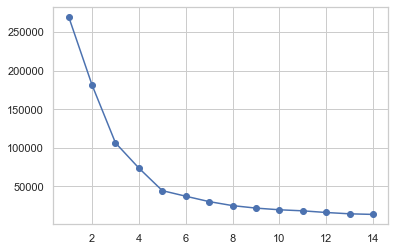

In [18]:
plt.plot(k_range,inertia,marker='o');

K=5

In [19]:
kmeans= KMeans(n_clusters=5)
kmeans.fit(new_data)

KMeans(n_clusters=5)

In [20]:
label_5=kmeans.labels_
centers_5= kmeans.cluster_centers_

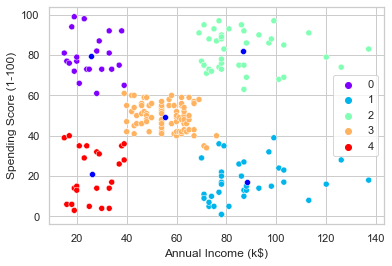

In [21]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=new_data,hue=label_5,palette='rainbow')
sns.scatterplot(x= centers_5[:,0],y=centers_5[:,1],color='blue');